In [1]:
import sys
from pathlib import Path

# Go up a directory to import datafawn package
parent = Path.cwd().parent   
sys.path.append(str(parent))

import datafawn
import pandas as pd

In [2]:
EXAMPLE_DATA_PATH = "../deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5"
data = pd.read_hdf(EXAMPLE_DATA_PATH)

paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
reference_map = {
    'back_base': ['front_left_paw', 'front_right_paw'],
    'tail_base': ['back_left_paw', 'back_right_paw']
}

In [3]:
error_pp = datafawn.ErrorPostprocessor(
    bodyparts=paws,
    use_velocity=False,
    use_likelihood=True,
    use_distance=False,
    velocity_kwargs={'threshold_pixels': 50, 'window_size': 5},
    likelihood_kwargs={'min_likelihood': 0.8},
    distance_kwargs={'reference_map': reference_map, 'max_distance': 300}
    )

In [4]:
processed_data = error_pp.process(data)

In [5]:
processed_data

scorer      superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_  \
individuals                                                     animal0   
bodyparts                                                          nose   
coords                                                                x   
0                                                   296.742188            
1                                                   409.570312            
2                                                   417.406250            
3                                                   414.882812            
4                                                   414.515625            
..                                                         ...            
610                                                 412.054688            
611                                                 411.562500            
612                                                 401.429688            
613                                                 397.914062            
614                                                 392.843750            

scorer                                                                 \
individuals                                                             
bodyparts                            upper_jaw                          
coords                y likelihood           x           y likelihood   
0            197.679688   0.017870  267.007812  276.070312   0.076479   
1            166.476562   0.084443  412.523438  166.476562   0.100471   
2            158.476562   0.784098  417.406250  166.070312   0.817460   
3            156.476562   0.755869  411.523438  163.195312   0.666153   
4            155.070312   0.533520  414.515625  158.773438   0.633309   
..                  ...        ...         ...         ...        ...   
610          230.304688   0.923726  408.289062  234.070312   0.839059   
611          236.242188   0.893934  411.562500  240.101562   0.882347   
612          244.218750   0.890269  401.429688  248.156250   0.895952   
613          250.664062   0.911301  397.914062  254.460938   0.865671   
614          259.460938   0.906520  392.843750  263.257812   0.917825   

scorer                                                          ...  \
individuals                                                     ...   
bodyparts     lower_jaw                        mouth_end_right  ...   
coords                x           y likelihood               x  ...   
0            239.976562  322.023438   0.229531      294.039062  ...   
1            238.289062  305.273438   0.225051      388.898438  ...   
2            413.593750  166.070312   0.593355      405.968750  ...   
3            260.351562  317.726562   0.357380      398.085938  ...   
4            258.328125  288.382812   0.469564      414.515625  ...   
..                  ...         ...        ...             ...  ...   
610          408.289062  237.835938   0.743492      404.523438  ...   
611          407.687500  243.960938   0.729425      399.937500  ...   
612          401.429688  248.156250   0.743383      393.585938  ...   
613          397.914062  258.257812   0.785781      390.320312  ...   
614          392.843750  267.054688   0.724801      385.218750  ...   

scorer                                                          \
individuals                                                      
bodyparts   back_right_paw belly_bottom                          
coords          likelihood            x           y likelihood   
0                      NaN   280.523438  276.070312   0.341986   
1                      NaN   288.492188  275.742188   0.343826   
2                      NaN   283.968750  272.382812   0.711375   
3                      NaN   280.507812  267.335938   0.467271   
4                      NaN   273.203125  288.382812   0.259758   
..                     ...          ...         ...        ...   
610               0.855225   287.789062  335.742188 

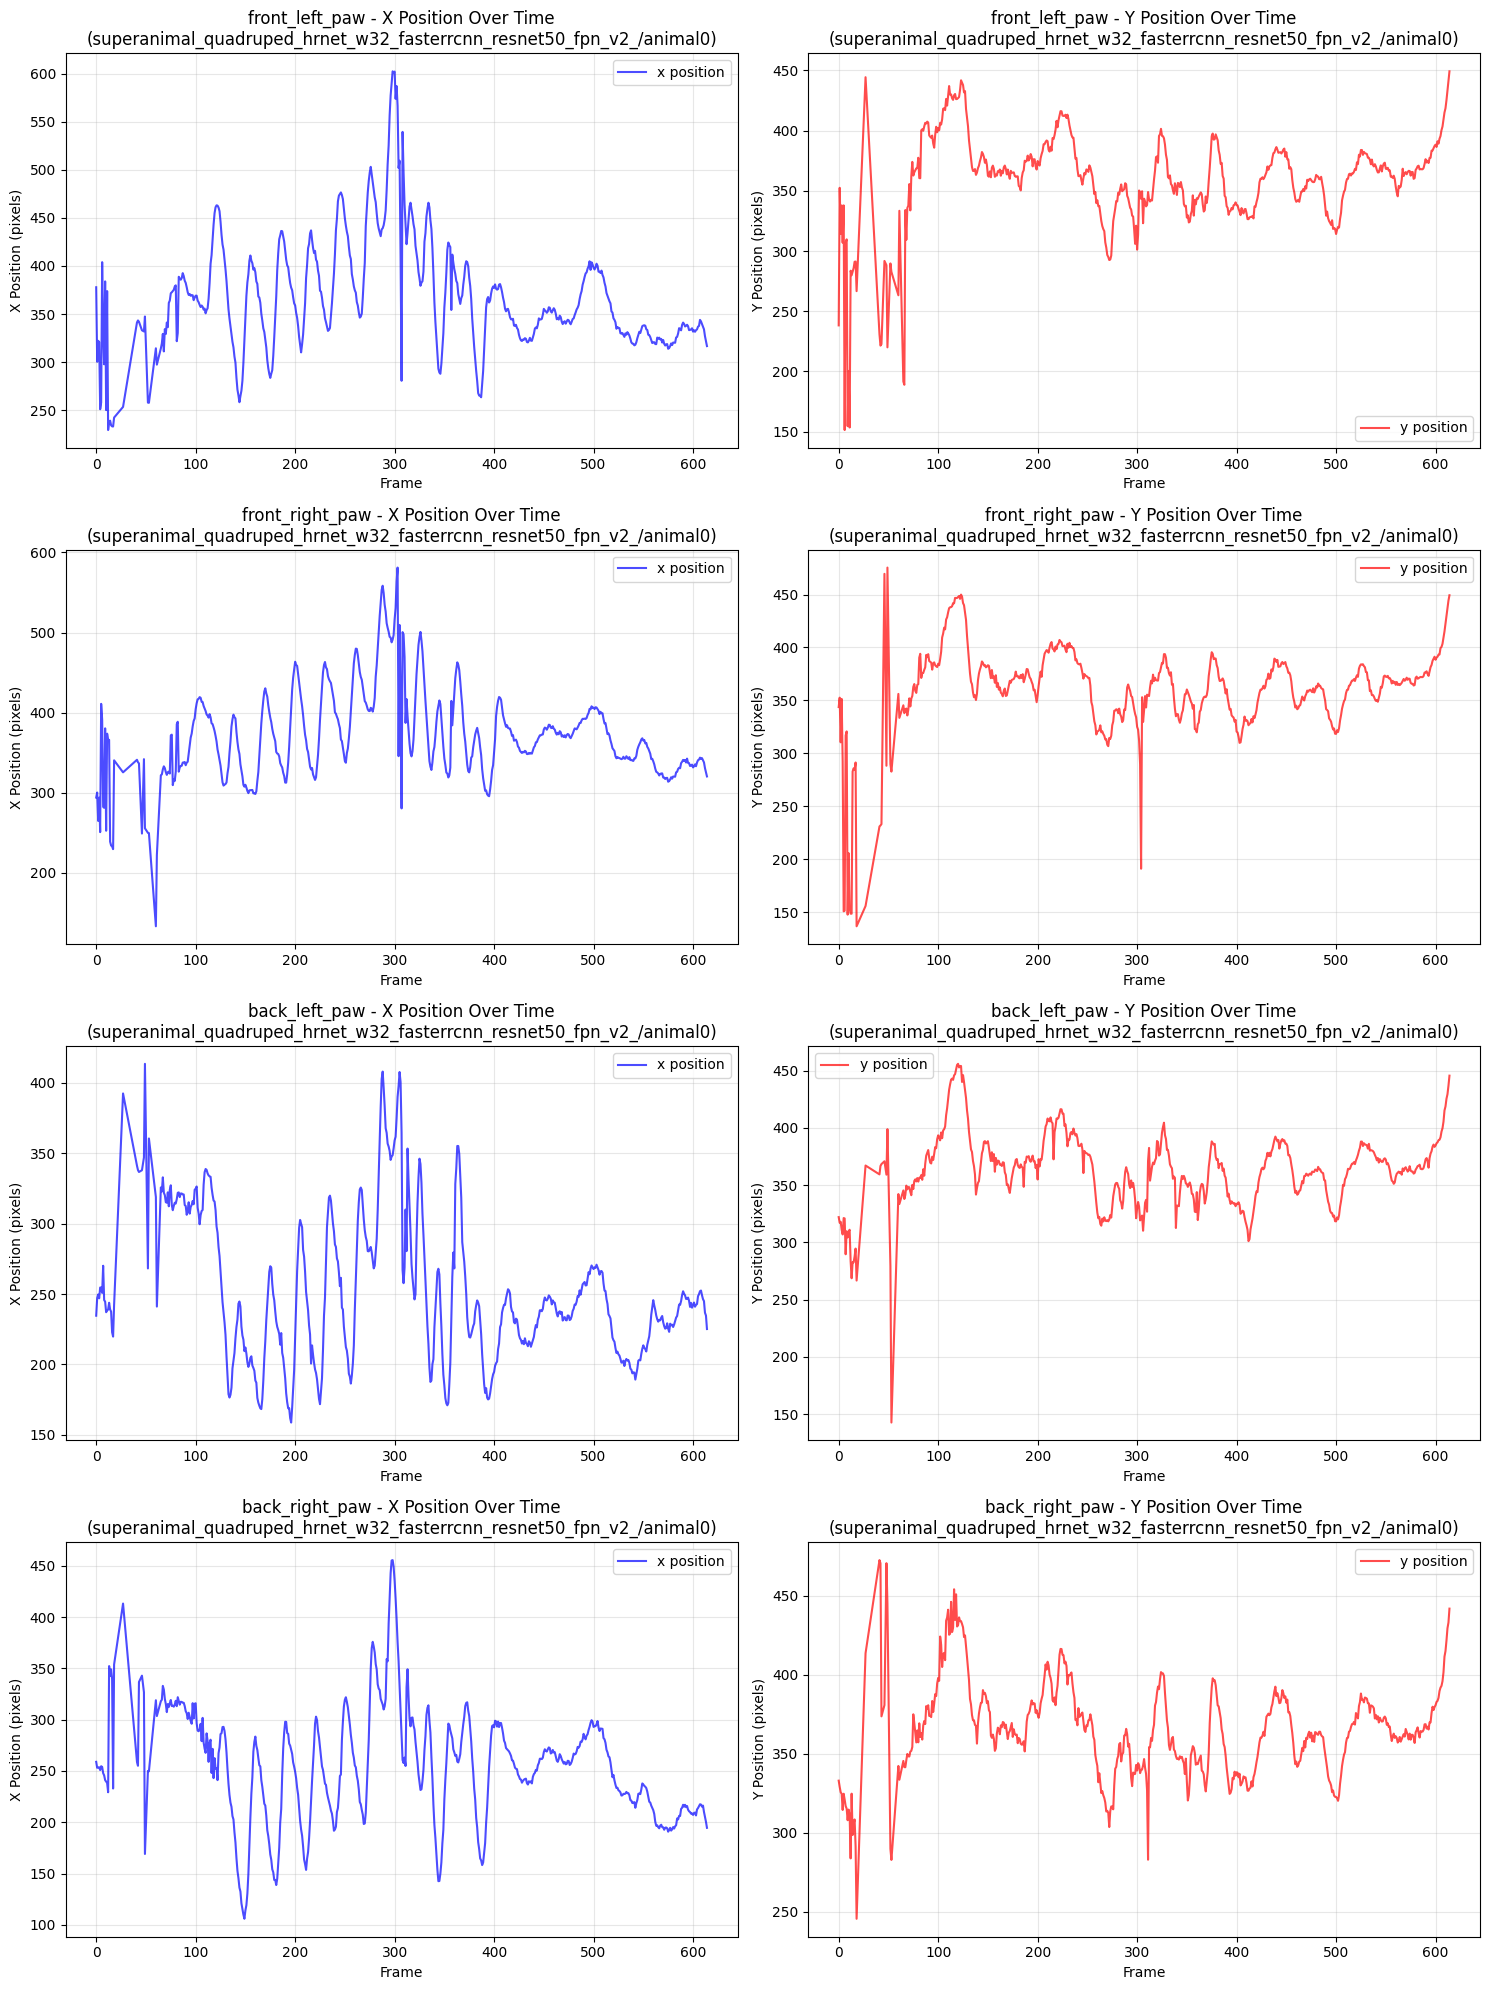

In [6]:
fig = datafawn.plot_bodyparts_position(data, bodyparts=paws)

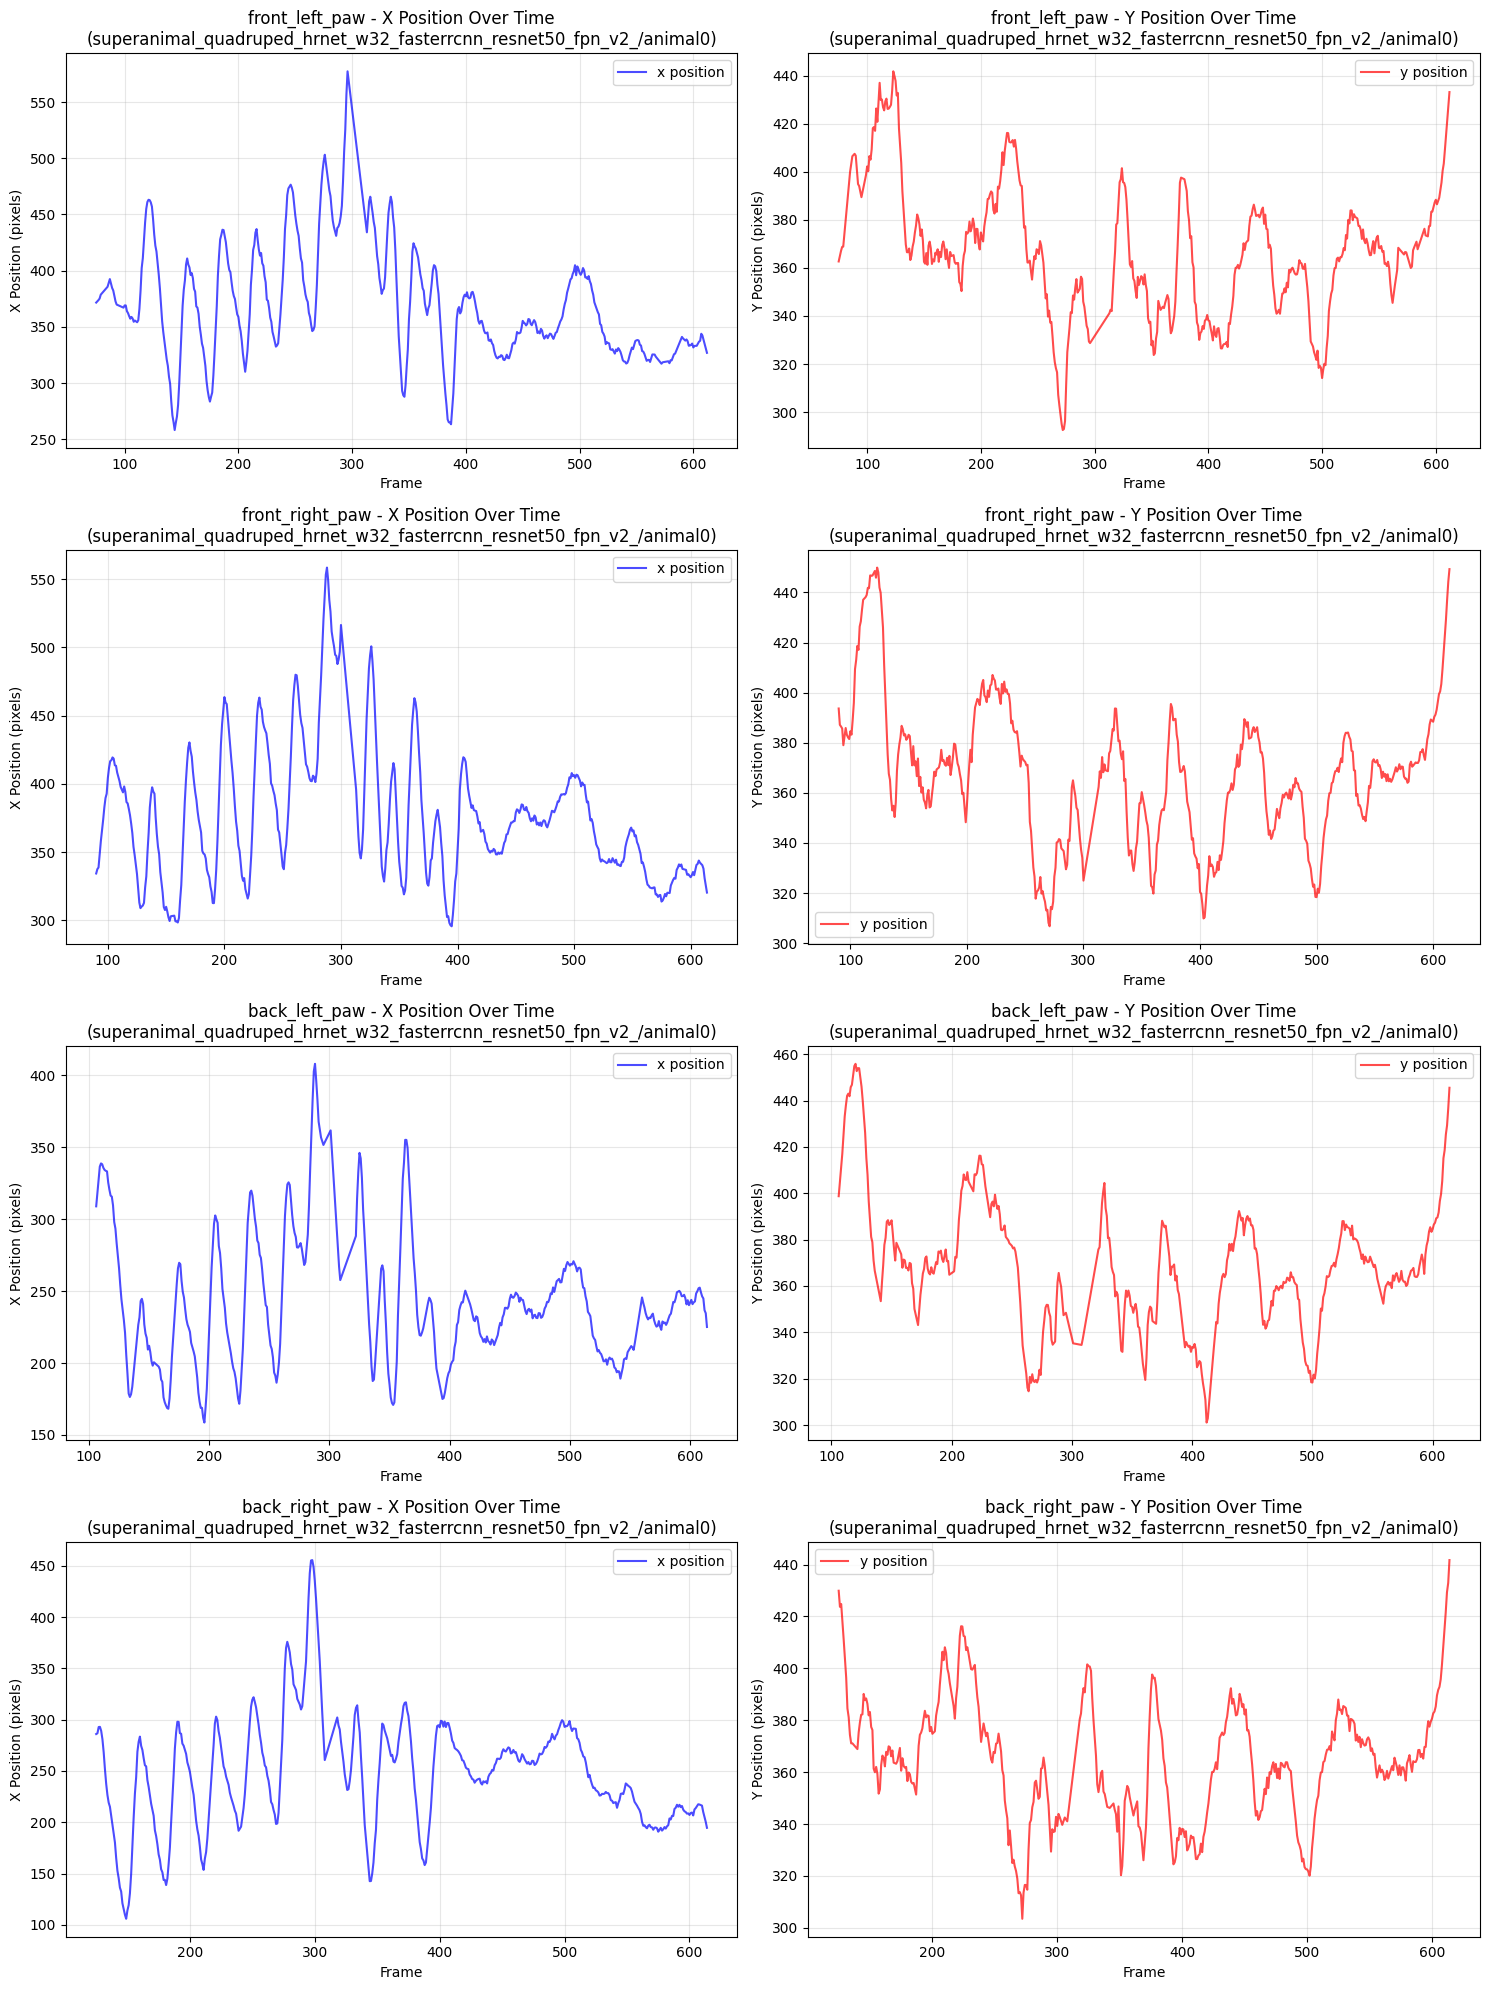

In [7]:
fig = datafawn.plot_bodyparts_position(processed_data, bodyparts=paws)